# STUDENT KEY PERFORMANCE INDICATOR

Life cycle of a Machine learning Project

1.  Understanding the Problem statement
2. Data collection
3. Data checks to perform
4. Exploratory data analysis
5. Data Pre-processing
6. Model training
7. Choose best model


1) Problem statement

    This project understands how the student performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## Import Data and required packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Import csv data as Pandas Dataframe and display first 5 records

In [2]:
df = pd.read_csv("stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of the dataset

In [3]:
df.shape
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

## Dataset Information

- gender : sex of students -> (Male/Female)
- race_ethnicity : entnicity of student -> (Group A/B/C/D/E)
- parental_level_of_education : parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- Lunch : having lunch before test (standard or free/reduced)
- test_preparation_course : complete or not complete before test
- math_score
- reading_score
- writing_score

## Checks to perform

- Check missing values
- Check  duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## Check missing values

In [4]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

# There are no missing values in the data set

## Check duplicate values

In [5]:
df.duplicated().sum()

0

# There are no duplicate values in the data set.

## Check data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Checking the number of unique values of each column

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Check statistics of data set

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights

- From the above stats, the mean of all three numerical features are close to each other. i.e. 66.08 and 68.05
- All standard deviations are close - between 14.6 and 15.19
- while minimum score of maths is 0, for writing is much hight = 10 and for reading=17

## Exploring Data

In [9]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [10]:
print("Categories in 'gender' variable:     ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:     ", end=" ")
print(df['race_ethnicity'].unique() )

print("Categories in 'parental_level_of_education' variable:     ", end=" ")
print(df['parental_level_of_education'].unique() )

print("Categories in 'lunch' variable:     ", end=" ")
print(df['lunch'].unique() )

print("Categories in 'test_preparation_course' variable:     ", end=" ")
print(df['test_preparation_course'].unique() )

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:      ['none' 'completed']


In [11]:
#define numerical and categorical columns:

numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print("We have {} numerical feature : {}".format(len(numeric_feature), numeric_feature))
print("We have {} categorical feature : {}".format(len(categorical_feature), categorical_feature))

We have 3 numerical feature : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding total score and average columns

In [12]:
df['Total score'] = df['math_score']+df['reading_score']+df[ 'writing_score']
df['Average'] = df['Total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
math_full = df[df['math_score'] == 100]['Average'].count()
reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()

print(f"Number for students with full marks in Maths: {math_full}")
print(f"Number for students with full marks in Redaing: {reading_full}")
print(f"Number for students with full marks in writing: {writing_full}")

Number for students with full marks in Maths: 7
Number for students with full marks in Redaing: 17
Number for students with full marks in writing: 14


In [14]:
math_less_20 = df[df['math_score'] <= 20]['Average'].count()
reading_less_20 = df[df['reading_score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average'].count()

print(f"Number for students with less than and equal to 20 marks in Maths: {math_less_20}")
print(f"Number for students with less than and equal to 20 marks in Redaing: {reading_less_20}")
print(f"Number for students with less than and equal to 20 marks in writing: {writing_less_20}")

Number for students with less than and equal to 20 marks in Maths: 4
Number for students with less than and equal to 20 marks in Redaing: 1
Number for students with less than and equal to 20 marks in writing: 3


## Insights

- From above values we get students have performed the worst in Maths
- Best performance is in Reading

# Exploring Data Visualization

- Visualize average score distribution to make some conclusion
    1. Histogram
    2. Kernel Distribution Function (KDE)

<function matplotlib.pyplot.show(close=None, block=None)>

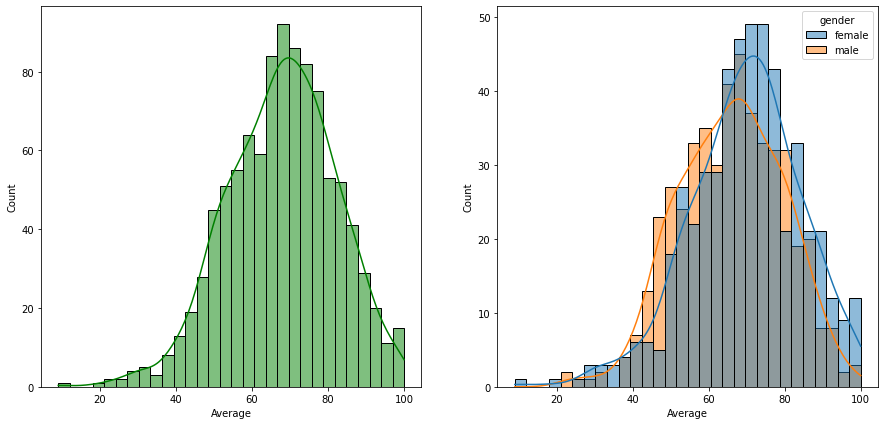

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average',bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average',bins=30, kde=True, hue='gender')
plt.show


## Insights

- Female students tend to perform well than male students

<function matplotlib.pyplot.show(close=None, block=None)>

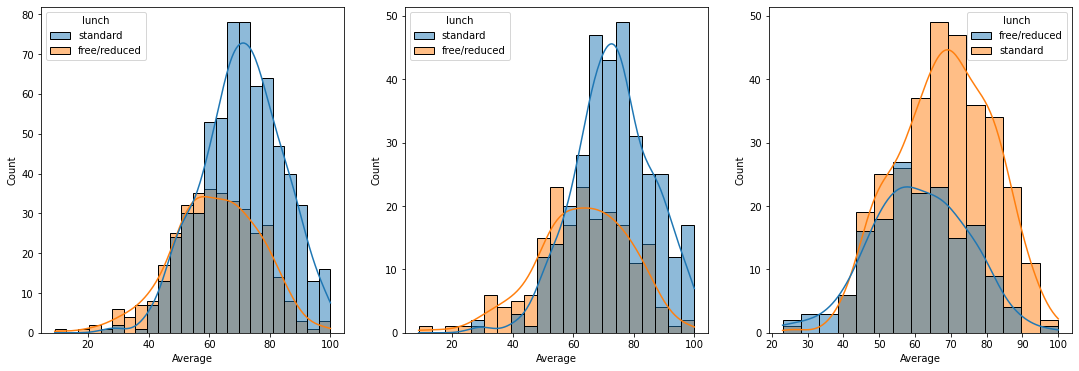

In [16]:
fig, axs = plt.subplots(1, 3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='lunch')
plt.show


## Insights

- Standard lunch helps to perform well in exams
- Standard lunch helps to perform well in exams be it a male or female.

<function matplotlib.pyplot.show(close=None, block=None)>

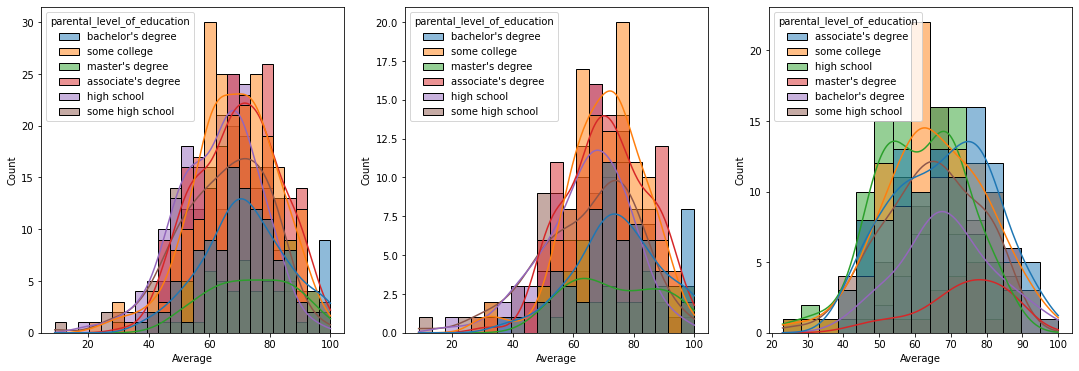

In [17]:
fig, axs = plt.subplots(1, 3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='parental_level_of_education')
plt.show


## Insights
- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

<function matplotlib.pyplot.show(close=None, block=None)>

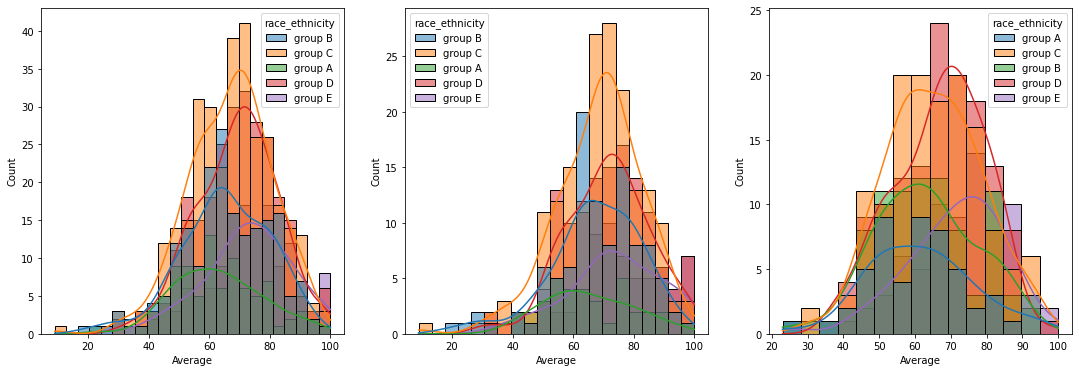

In [18]:
fig, axs = plt.subplots(1, 3, figsize = (25,6))
plt.subplot(141)
sns.histplot(data=df, x='Average', kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='race_ethnicity')
plt.show


## Insights

- Students in group A and B tends to perform poor irrespective of whether they are male or female.

## Maximum score of students in all three subjects

<AxesSubplot:title={'center':'MATHS SCORE'}, ylabel='math_score'>

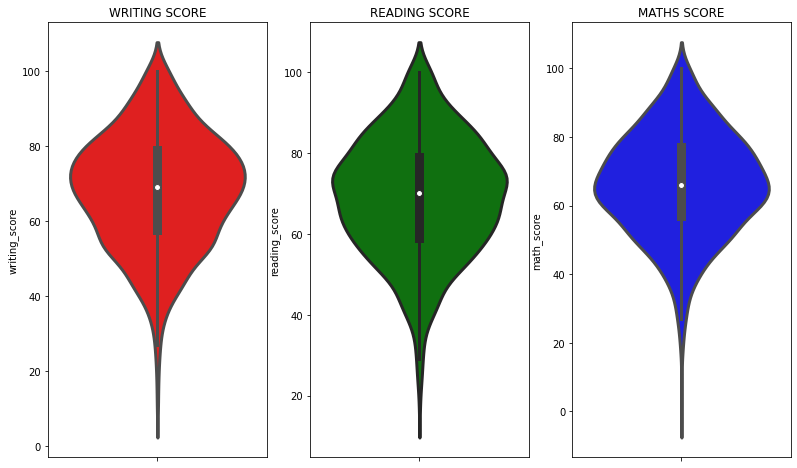

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score', data=df, color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading_score', data=df, color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('MATHS SCORE')
sns.violinplot(y='math_score', data=df, color='blue',linewidth=3)

## Insights

- From above three plots, its is clearly visible that most of student score between 60-80 for maths as well as for reading and for writing most of them score between 50-80.

## Multivarite Analysis using pieplot

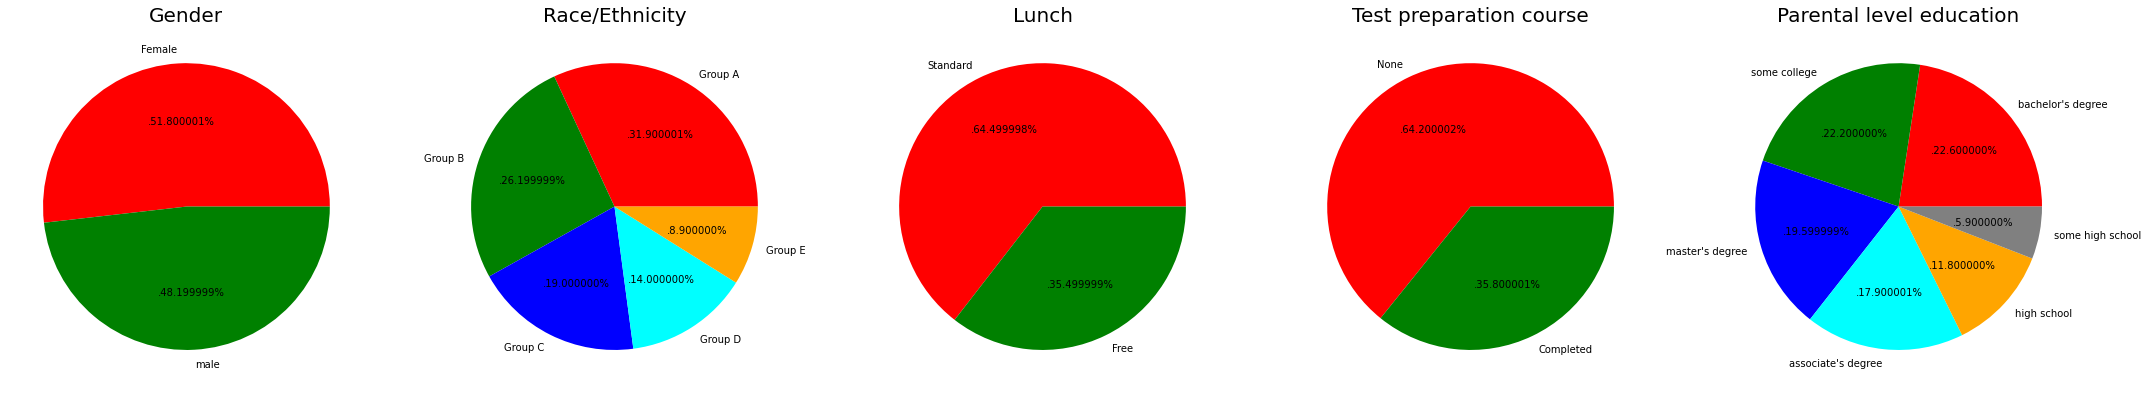

In [20]:
plt.rcParams['figure.figsize']=[30,12]

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','male'
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
color = ['red','green','blue','cyan','orange']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Lunch',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Test preparation course',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = "bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'
color = ['red','green','blue','cyan','orange','grey']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental level education',fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

## Insights

- Pie 1 - The number of male and  female is nearly equal
- Pie 2 - Number students are greatest in Group A
- Pie 3 - Number of students who have standard lunch are greater
- Pie 4 - Number of students who have not enrolled in any test preparation course is greater
- Pie 5 - Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## Feature wise visualization

### Gender column

- Does gender has an impact on students performance?

## Univariate Analysis

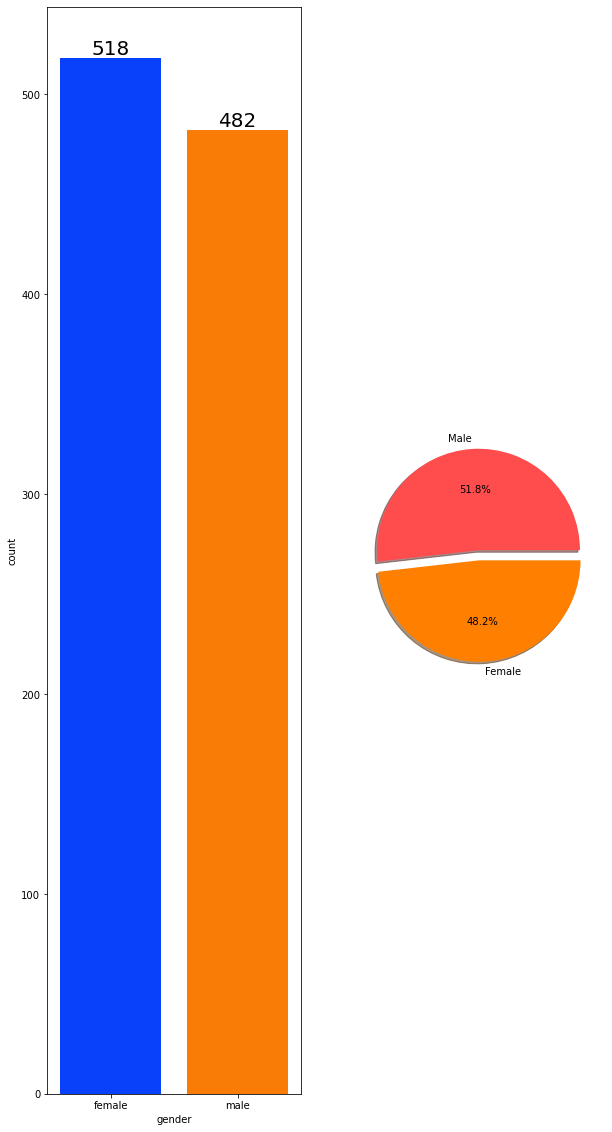

In [23]:
f, ax = plt.subplots(1,2, figsize = (10,20))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(), labels=['Male','Female'], explode=[0,0.1], autopct='%1.1f%%', shadow=True,colors=['#ff4d4d','#ff8000'] )
plt.show()

## Insights

- Gender has balanced data with female 518 (48%) and male students are 482(52%)

### Bivariate analysis

In [24]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,Total score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


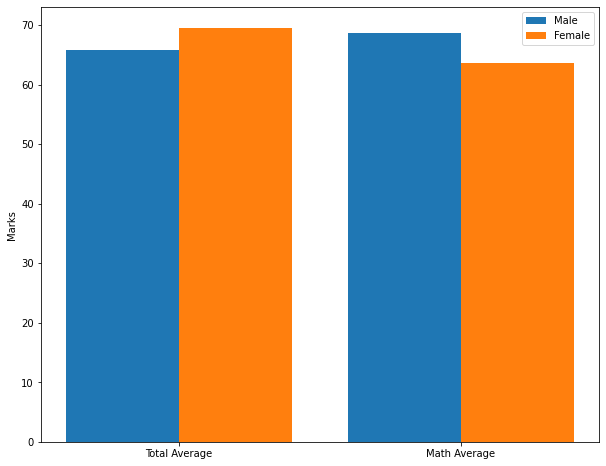

In [25]:
plt.figure(figsize=(10,8))

x=['Total Average','Math Average']

female_score = [gender_group['Average'][0], gender_group['math_score'][0]]
male_score = [gender_group['Average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(x))

plt.bar(X_axis - 0.2, male_score, 0.4,label='Male')
plt.bar(X_axis + 0.2, female_score, 0.4,label='Female')

plt.xticks(X_axis, x)
plt.ylabel("Marks")
plt.legend()
plt.show()





## Insight

- On an average females have a better overall score than men.
- Whereas males have scored higher in Maths.

## Checking Outliers

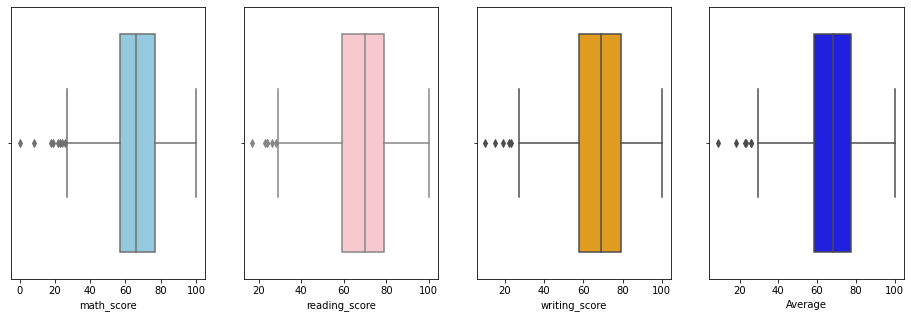

In [26]:
plt.subplots(1,4, figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='pink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='orange')
plt.subplot(144)
sns.boxplot(df['Average'],color='blue')
plt.show()

## Multivariate analysis using pairplot

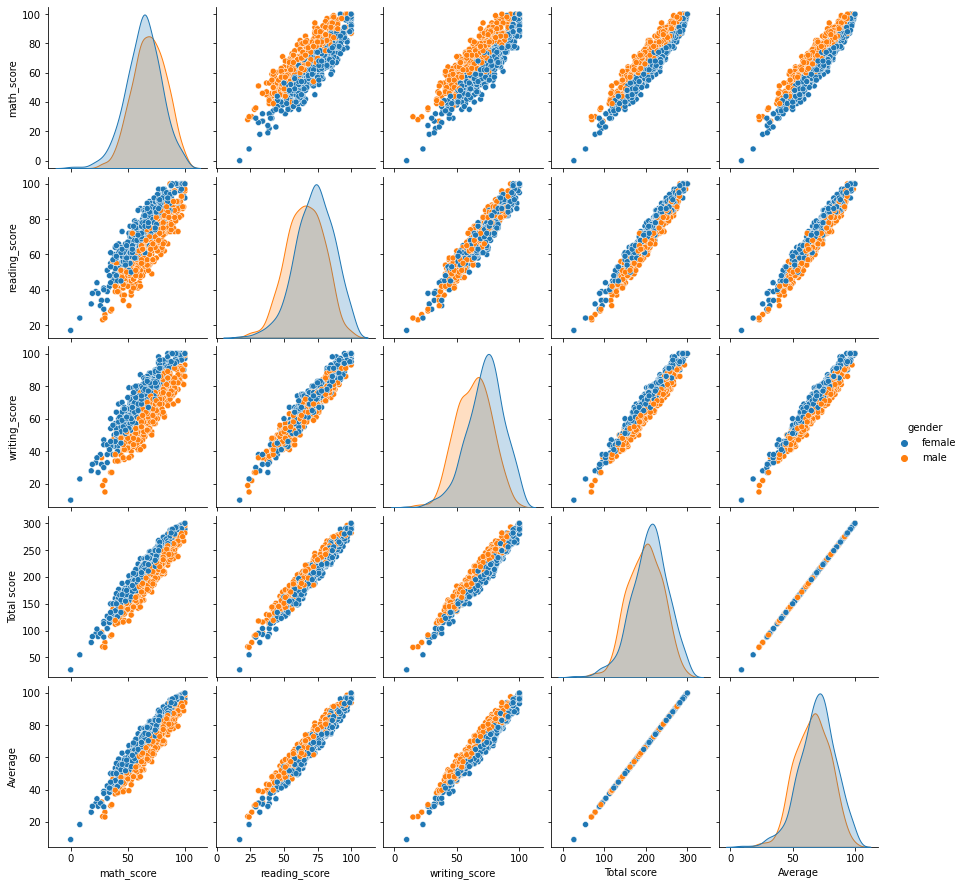

In [27]:
sns.pairplot(df, hue='gender')
plt.show()

## Insights

- From above plot it is clear that all the scores increase linearly with each other
- All the values are normally distributed